# Titanic Dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_pd = pd.read_csv('./titanic/train.csv')
test_pd = pd.read_csv('./titanic/test.csv')

train_pd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
survived = train_pd['Survived']
train_pd = train_pd.drop(['Survived'], axis=1)


In [4]:
train_pd.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_idx = train_pd['PassengerId']
test_idx = test_pd['PassengerId']

combined_pd = pd.concat([train_pd, test_pd]).reset_index(drop=True)
combined_pd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Dealing with NaNs


In [6]:
print('Null values')
print(combined_pd.isnull().sum())

Null values
PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


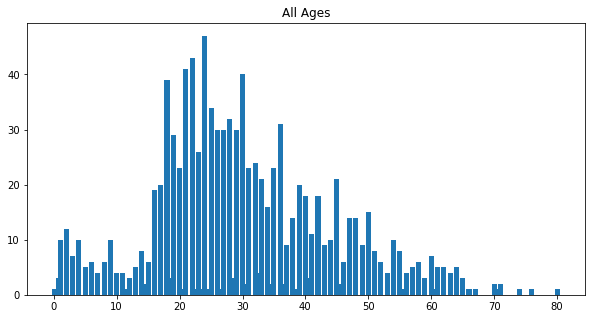

In [7]:
y = combined_pd['Age'].value_counts()
x = y.index.values

plt.figure(figsize=(10,5))
plt.title('All Ages')
plt.bar(x,y)
plt.show()

### Age in different classes

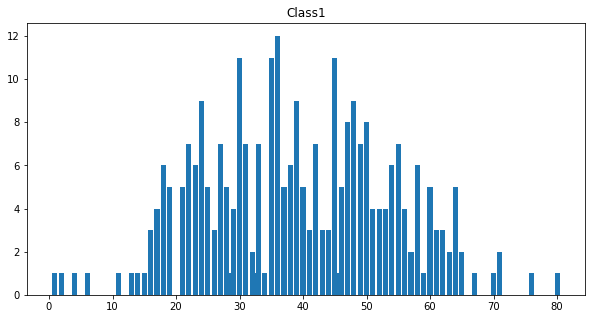

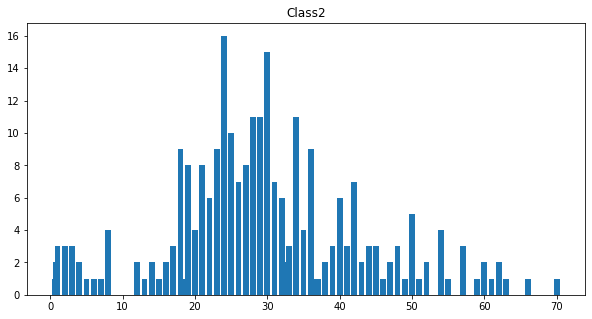

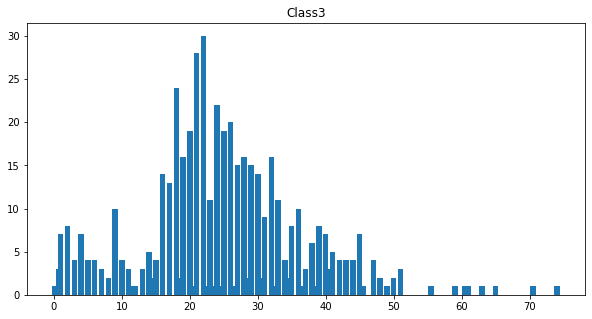

In [8]:
class_age = combined_pd[['Pclass', 'Age']]

for i in range(1,4):
    plt.figure(figsize=(10,5))
    plt.title('Class' + str(i))
    y = class_age[class_age['Pclass']==i]['Age'].value_counts()
    x = y.index.values
    plt.bar(x,y)
    plt.show()

In [9]:
medians = class_age.groupby(['Pclass']).median()
medians

,Age
Pclass,
1,39.0
2,29.0
3,24.0


### Replacing missing age with class median

In [10]:
for i in range(3):
    idx = np.where((combined_pd['Pclass'] == i+1) & (combined_pd['Age'].isnull()))[0]
    combined_pd.loc[idx, 'Age'] = medians.values[i][0]
    
combined_pd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


### Missing Fare

In [11]:
display(combined_pd[combined_pd['Fare'].isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [12]:
class_emb_median = combined_pd.groupby(['Pclass', 'Embarked'])['Fare'].median()
class_emb_median

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [13]:
combined_pd['Fare'].fillna(class_emb_median.values[-1], inplace=True)
display(combined_pd[combined_pd['Fare'].isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Missing Embarked

In [14]:
display(combined_pd[combined_pd['Embarked'].isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [15]:
sim_emb = combined_pd[(combined_pd['Pclass'] == 1) & (combined_pd['Fare'] >= 70) & (combined_pd['Fare'] <= 90)]['Embarked']

print(sim_emb.value_counts())


C    29
S    25
Q     3
Name: Embarked, dtype: int64


In [16]:
combined_pd['Embarked'].fillna('C', inplace=True)
display(combined_pd[combined_pd['Embarked'].isnull()])


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Missing Cabins

In [17]:
combined_pd['Cabin'].fillna('M', inplace=True)
combined_pd['Cabin'] = combined_pd['Cabin'].str[0]

combined_pd['Cabin'].value_counts()



M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [18]:
idx = np.where(combined_pd['Cabin']=='T')[0]
combined_pd.loc[idx, 'Cabin'] = 'M'

In [19]:
combined_pd.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Uniques

In [20]:
combined_pd.nunique()

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin             8
Embarked          3
dtype: int64

### Processing Names

In [21]:
print(combined_pd['Name'].unique())

names = combined_pd['Name']

last_names = []
titles = []
first_names = []

for name in names:
    if ',' not in name:
        last_names.append('')
    else:
        last, name = name.split(',',1)
        last_names.append(last)
    
    if '.' not in name:
        titles.append('')
    else:
        title, first = name.split('.',1)
        titles.append(title.strip())
        first_names.append(first)
    

last_names = np.array(last_names)
titles = np.array(titles)
first_names = np.array(first_names)

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']


In [22]:
np.unique(titles, return_counts=True)

(array(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major',
        'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
        'the Countess'], dtype='<U12'),
 array([  1,   4,   1,   1,   8,   1,   1,   2,  61, 260,   2,   1, 757,
        197,   2,   8,   1,   1]))

### Groupping Titles

In [23]:
idx = np.where(np.isin(titles, ['Capt', 'Col', 'Major']))
titles[idx] = 'Military'

idx = np.where(np.isin(titles, ['Don', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Master', 'the Countess']))
titles[idx] = 'Nobility'

idx = np.where(np.isin(titles, ['Miss', 'Mlle', 'Ms']))
titles[idx] = 'Ms'

idx = np.where(np.isin(titles, ['Mrs', 'Mme']))
titles[idx] = 'Mrs'

np.unique(titles, return_counts=True)

(array(['Dr', 'Military', 'Mr', 'Mrs', 'Ms', 'Nobility', 'Rev'],
       dtype='<U12'),
 array([  8,   7, 757, 198, 264,  67,   8]))

In [24]:
combined_pd['Title'] = titles
combined_pd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr


### Groupping Ages

In [25]:
print(combined_pd['Age'].min(), combined_pd['Age'].max())

bins = np.array([0,10,20,30,40,50,60,70,80])

combined_pd['Age_Bin'] = pd.cut(combined_pd['Age'], bins)

0.17 80.0


In [26]:
combined_pd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]"


### Groupping Tickets

In [27]:
ticket_dict = dict(combined_pd['Ticket'].value_counts())

combined_pd['tkc_count'] = combined_pd['Ticket'].map(ticket_dict)

combined_pd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,tkc_count
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]",1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]",1
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]",1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,tkc_count,Fare_per_Ticket,Fare_Bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1,7.250000,"(0, 20]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2,35.641650,"(20, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1,7.925000,"(0, 20]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,26.550000,"(20, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1,8.050000,"(0, 20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3,36.300000,"(20, 40]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]",1,7.250000,"(0, 20]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]"


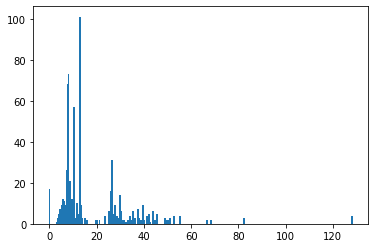

In [28]:
combined_pd['Fare_per_Ticket'] = combined_pd['Fare']/combined_pd['tkc_count']

plt.bar(combined_pd['Fare_per_Ticket'].value_counts().index.values, combined_pd['Fare_per_Ticket'].value_counts())

bins = np.array([0,20,40,60,80,150])
combined_pd['Fare_Bin'] = pd.cut(combined_pd['Fare_per_Ticket'], bins)

combined_pd

### Family onboard

In [29]:
combined_pd['Num_Family'] = combined_pd['SibSp'] + combined_pd['Parch'] + 1
combined_pd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,tkc_count,Fare_per_Ticket,Fare_Bin,Num_Family
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1,7.250000,"(0, 20]",2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2,35.641650,"(20, 40]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1,7.925000,"(0, 20]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,26.550000,"(20, 40]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1,8.050000,"(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]",1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3,36.300000,"(20, 40]",1
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]",1,7.250000,"(0, 20]",1
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]",1


### Dropping columns

In [30]:
combined_pd.drop(['Name', 'Age', 'Ticket', 'Fare', 'tkc_count', 'Fare_per_Ticket'], axis=1, inplace=True)
combined_pd

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare_Bin,Num_Family
0,1,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
1,2,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
2,3,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
3,4,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
4,5,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1
1305,1306,1,female,0,0,C,C,Nobility,"(30, 40]","(20, 40]",1
1306,1307,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
1307,1308,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1


In [31]:
print(combined_pd.nunique())

PassengerId    1309
Pclass            3
Sex               2
SibSp             7
Parch             8
Cabin             8
Embarked          3
Title             7
Age_Bin           8
Fare_Bin          5
Num_Family        9
dtype: int64


## Machine Learning with Random Forest Algorithm

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [33]:
combined_pd.set_index('PassengerId', inplace=True)

combined_pd

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare_Bin,Num_Family
PassengerId,,,,,,,,,,
1,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
2,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
3,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
4,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
5,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...
1305,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1
1306,1,female,0,0,C,C,Nobility,"(30, 40]","(20, 40]",1
1307,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1


### Transforming strings to ints

In [34]:
label_enc = combined_pd.copy()
label_enc = label_enc.astype(str)

label_enc = label_enc.apply(LabelEncoder().fit_transform)

label_enc

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare_Bin,Num_Family
PassengerId,,,,,,,,,,
1,2,1,1,0,7,2,2,2,0,2
2,0,0,1,0,2,0,3,3,1,2
3,2,0,0,0,7,2,4,2,0,0
4,0,0,1,0,2,2,3,3,1,2
5,2,1,0,0,7,2,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...
1305,2,1,0,0,7,2,2,2,0,0
1306,0,0,0,0,2,0,5,3,1,0
1307,2,1,0,0,7,2,2,3,0,0


In [35]:
one_hot = label_enc.copy()
one_hot = pd.get_dummies(one_hot, columns=['Sex', 'Embarked', 'Title'])

one_hot

,Pclass,SibSp,Parch,Cabin,Age_Bin,Fare_Bin,Num_Family,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
PassengerId,,,,,,,,,,,,,,,,,,,
1,2,1,0,7,2,0,2,0,1,0,0,1,0,0,1,0,0,0,0
2,0,1,0,2,3,1,2,1,0,1,0,0,0,0,0,1,0,0,0
3,2,0,0,7,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,0,1,0,2,3,1,2,1,0,0,0,1,0,0,0,1,0,0,0
5,2,0,0,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2,0,0,7,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1306,0,0,0,2,3,1,0,1,0,1,0,0,0,0,0,0,0,1,0
1307,2,0,0,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [36]:
X = one_hot.loc[train_idx].values
y = survived.values

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 19) (179, 19) (712,) (179,)


In [37]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train).score(X_test, y_test)

0.7932960893854749

In [38]:
params = { 'criterion':['gini', 'entropy'],
         'n_estimators':[20,50,100,200,300,400,500,800,1000],
         'max_depth':np.arange(3,50),
         'min_samples_split':np.arange(1,1000),
         'max_features':['sqrt', 'log2'],
         'max_samples':np.linspace(0.1,0.9,10)}

rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=0), params, scoring='accuracy', random_state=0, cv=5)
rand_search.fit(X_train, y_train)

rand_params = rand_search.best_params_
print(rand_params)
print('Train Acc:', rand_search.best_score_)
preds = rand_search.predict(X_test)
print('Test Acc:', accuracy_score(preds, y_test))



{'n_estimators': 200, 'min_samples_split': 16, 'max_samples': 0.6333333333333333, 'max_features': 'sqrt', 'max_depth': 49, 'criterion': 'gini'}
Train Acc: 0.8286417807544568
Test Acc: 0.8324022346368715


In [39]:
n_estimators = np.linspace(rand_params['n_estimators']-10, rand_params['n_estimators']+10, 3).astype(int)
min_samples_split = np.arange(rand_params['min_samples_split']-3, rand_params['min_samples_split']+3).astype(int)
max_samples = np.linspace(rand_params['max_samples']-.05, rand_params['max_samples']+.05)
max_depth = np.arange(rand_params['max_depth']-5, rand_params['max_depth']+5).astype(int)

params = { 'criterion':[rand_params['criterion']],
         'n_estimators':n_estimators,
         'max_depth':max_depth,
         'min_samples_split':min_samples_split,
         'max_features':[rand_params['max_features']],
         'max_samples':max_samples}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

grid_params = grid_search.best_params_
print(grid_params)
print('Train Acc:', grid_search.best_score_)
preds = grid_search.predict(X_test)
print('Test Acc:', accuracy_score(preds, y_test))

{'criterion': 'gini', 'max_depth': 44, 'max_features': 'sqrt', 'max_samples': 0.6098639455782312, 'min_samples_split': 15, 'n_estimators': 200}
Train Acc: 0.8356741849699597
Test Acc: 0.8324022346368715
